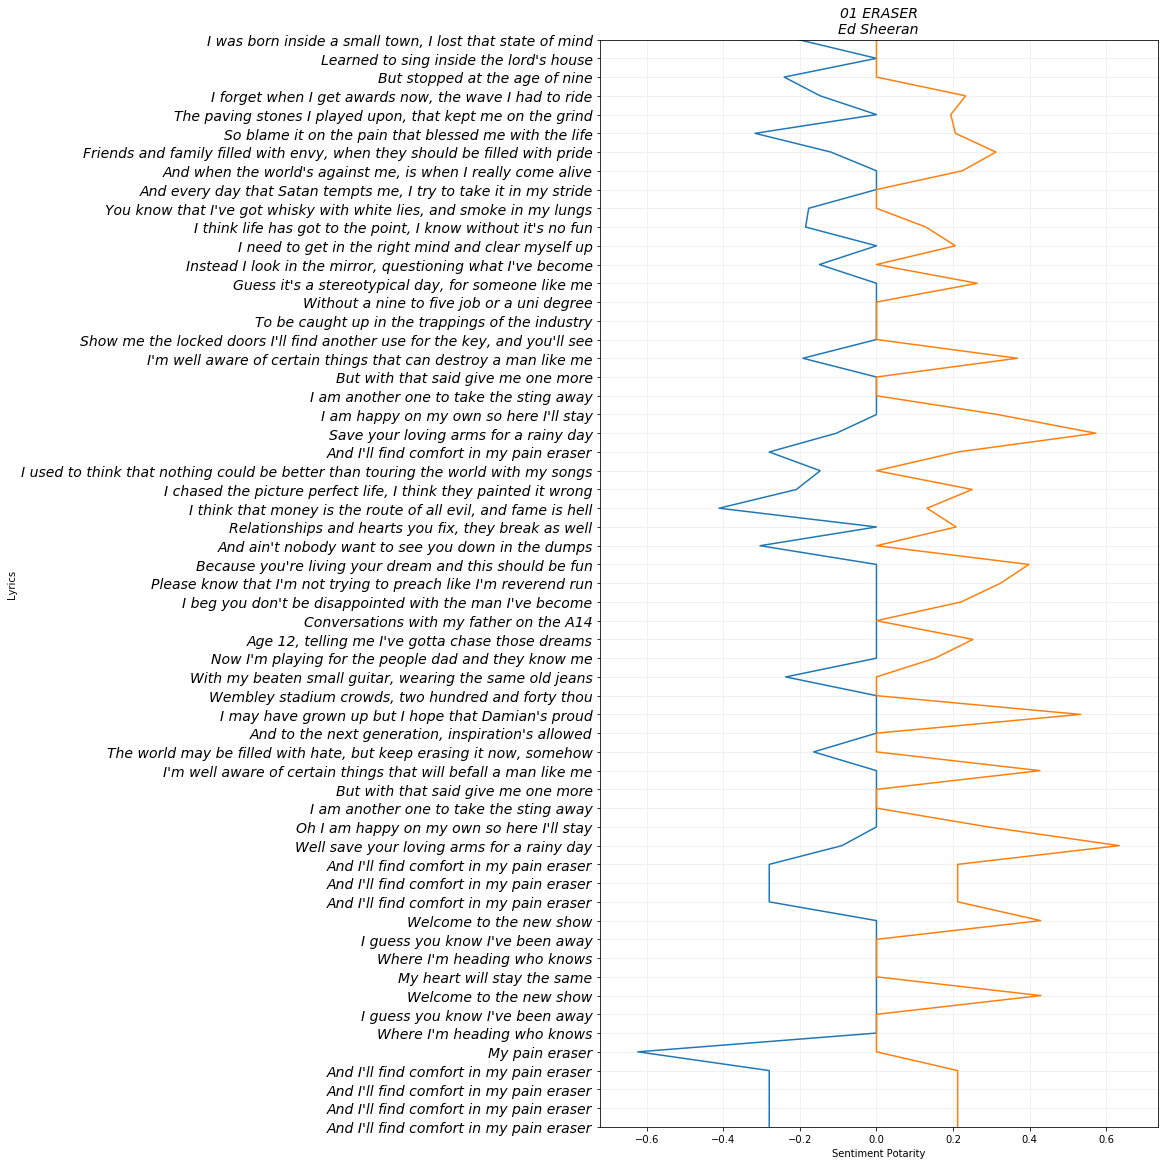

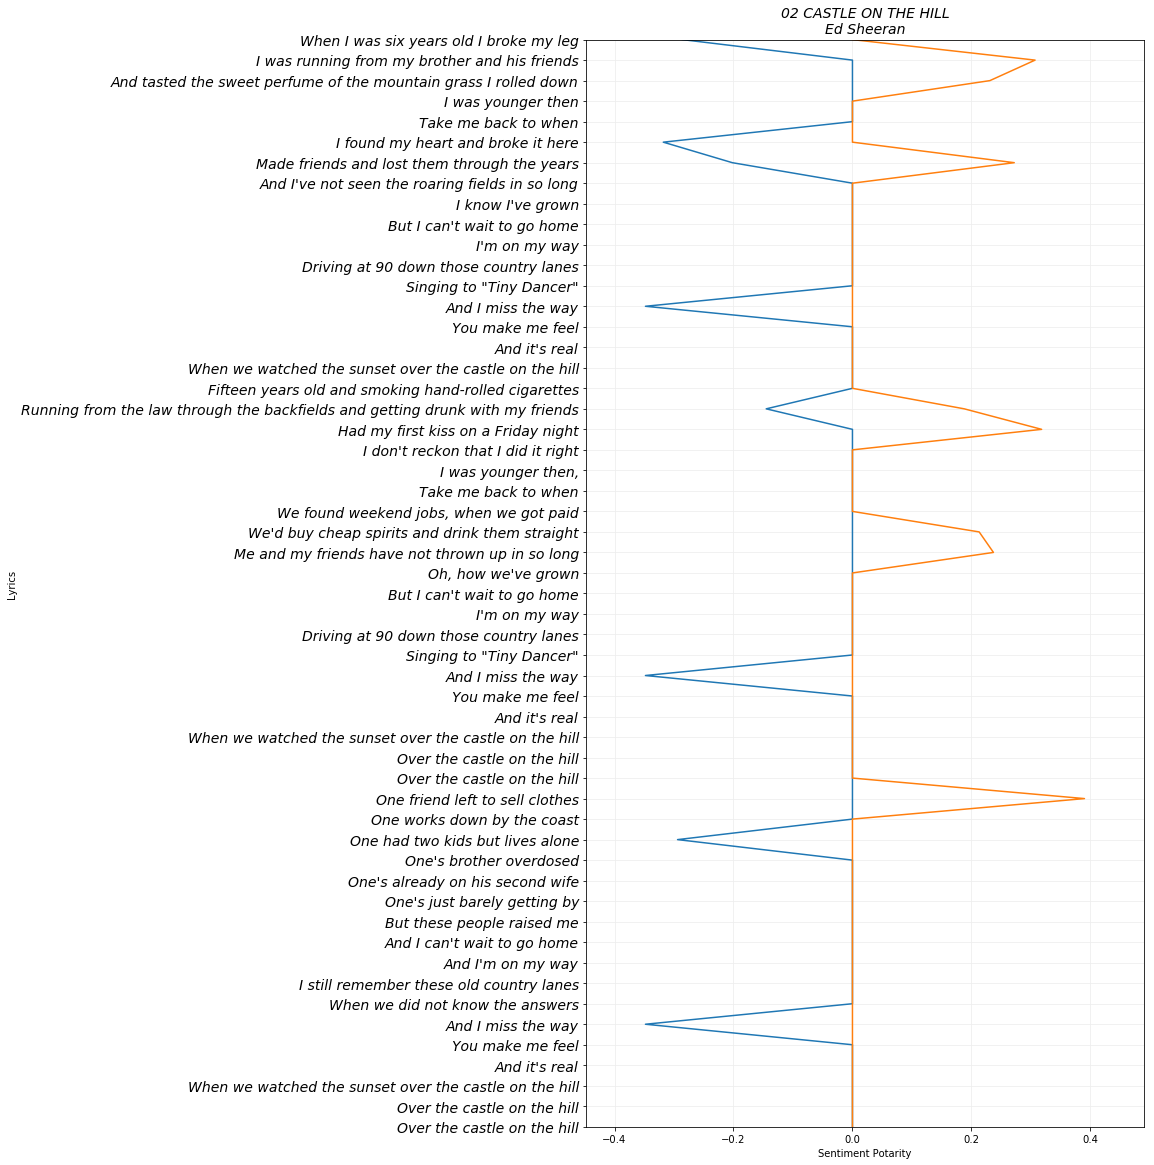

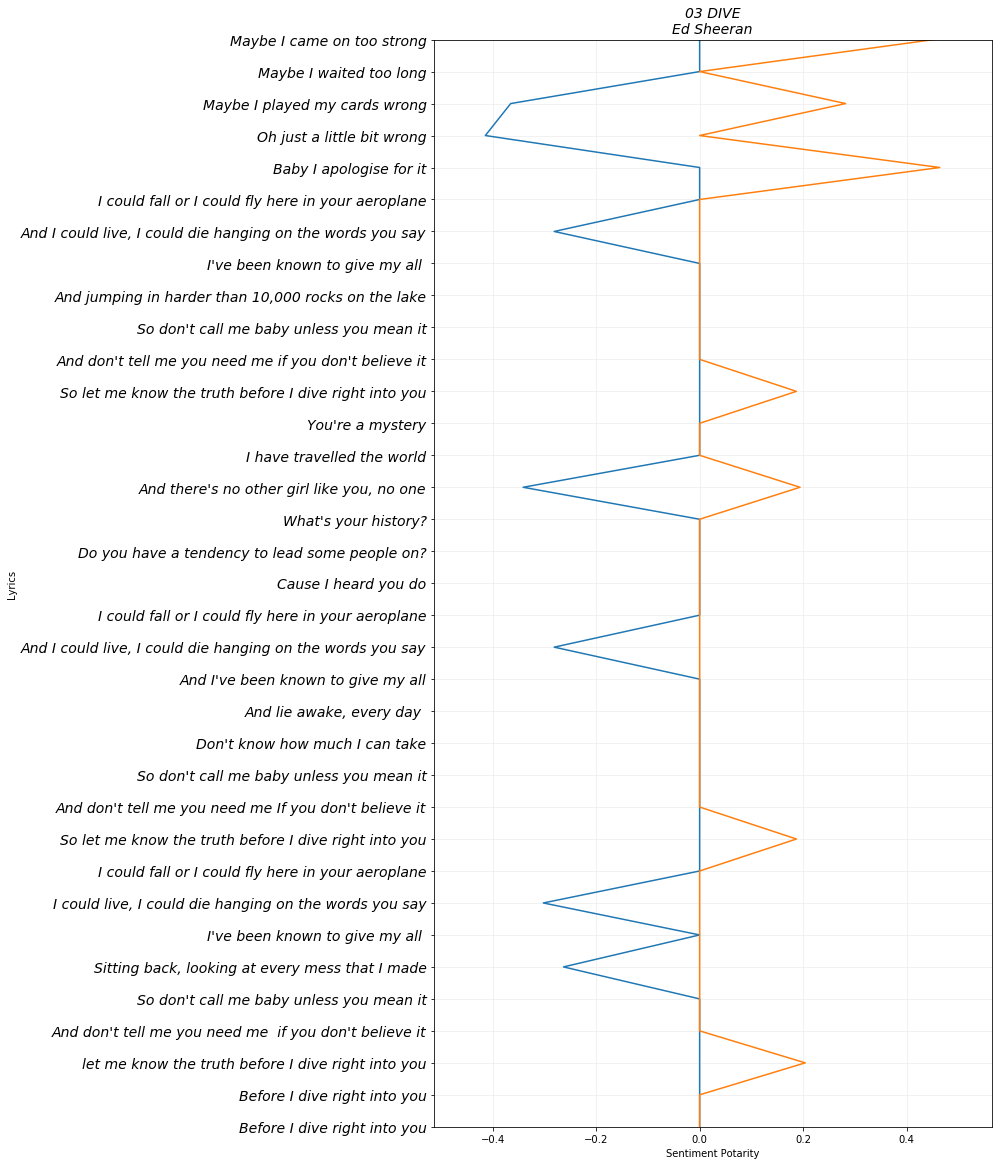

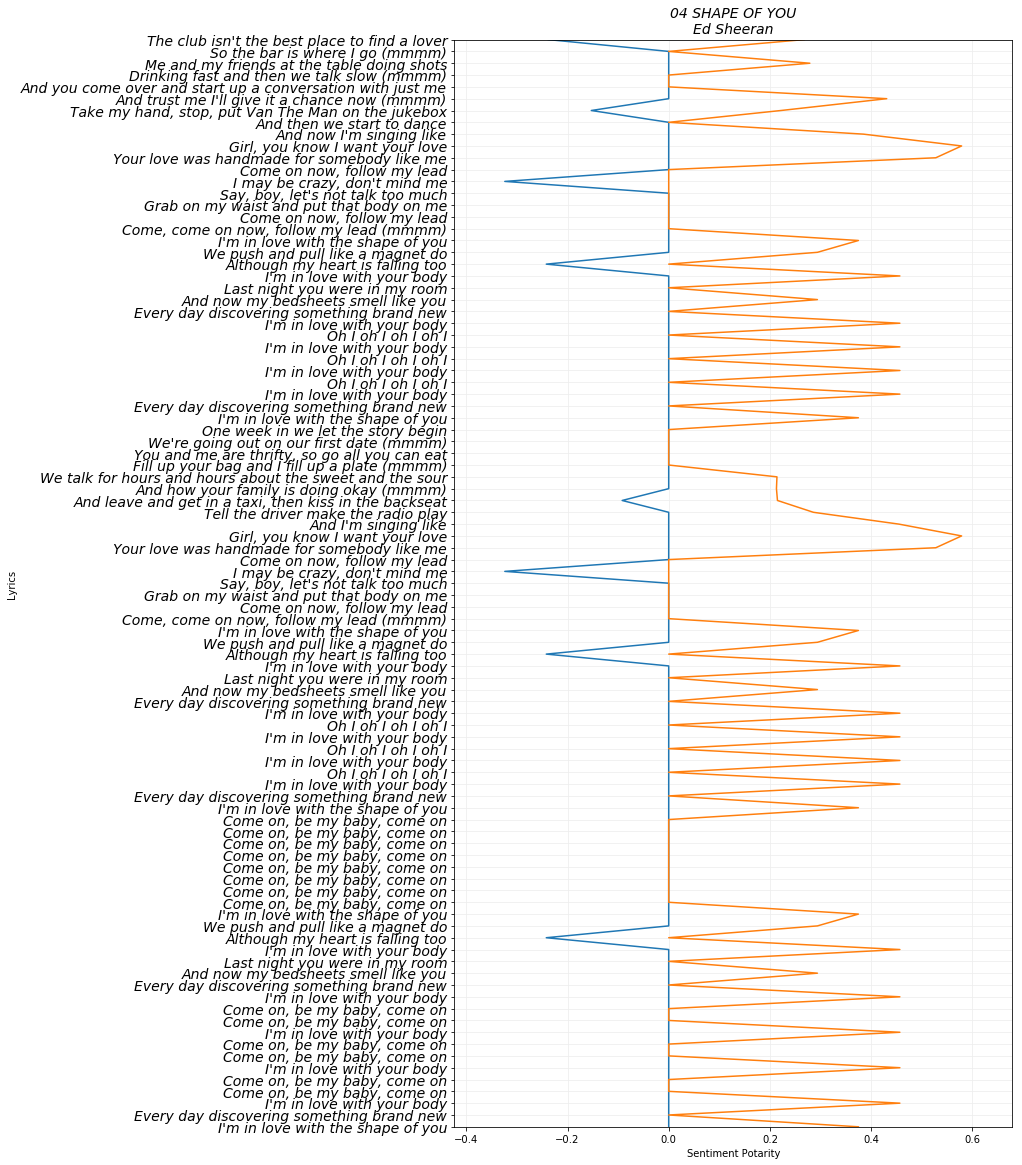

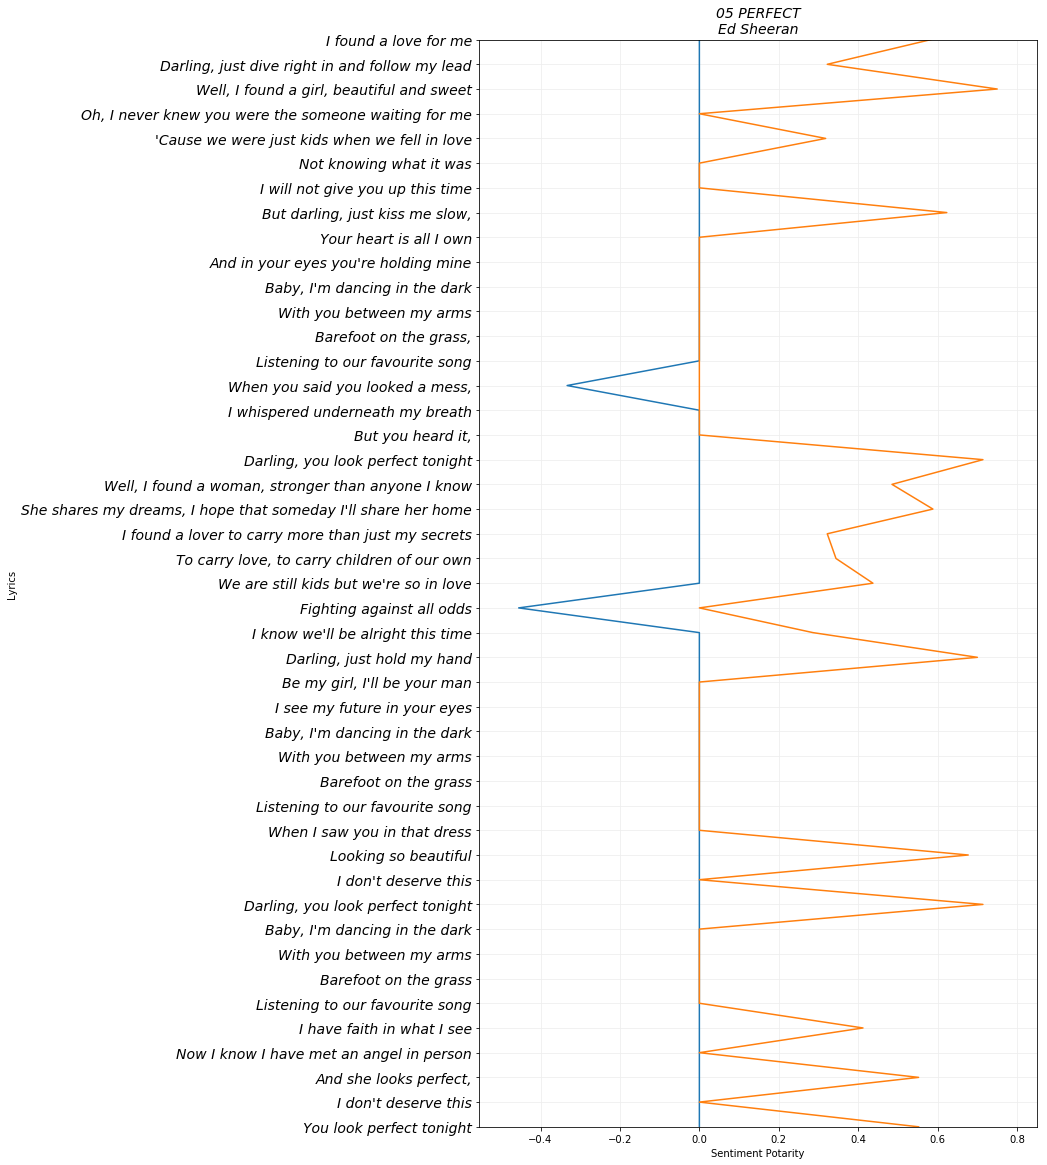

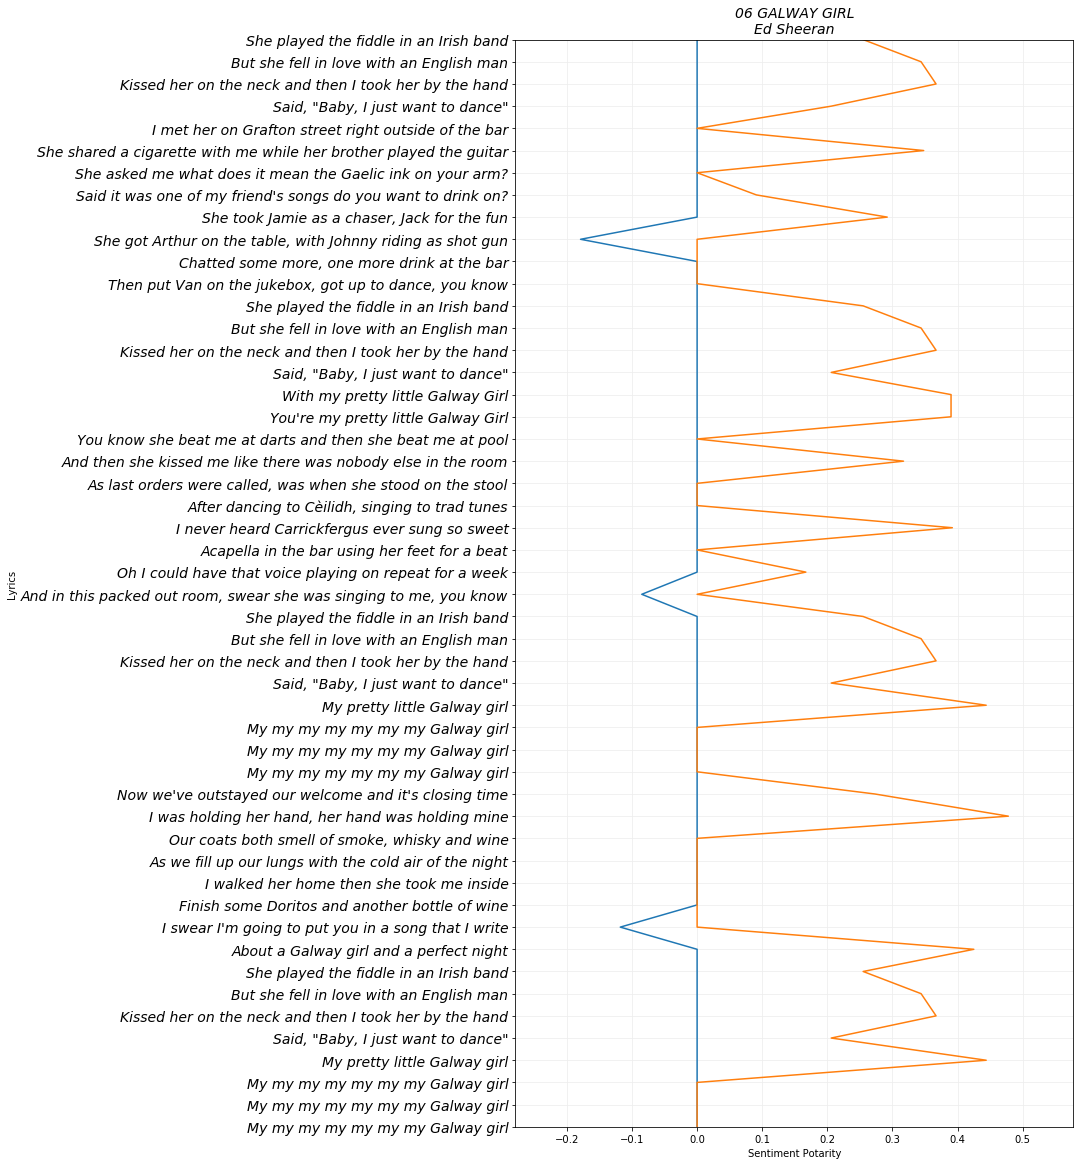

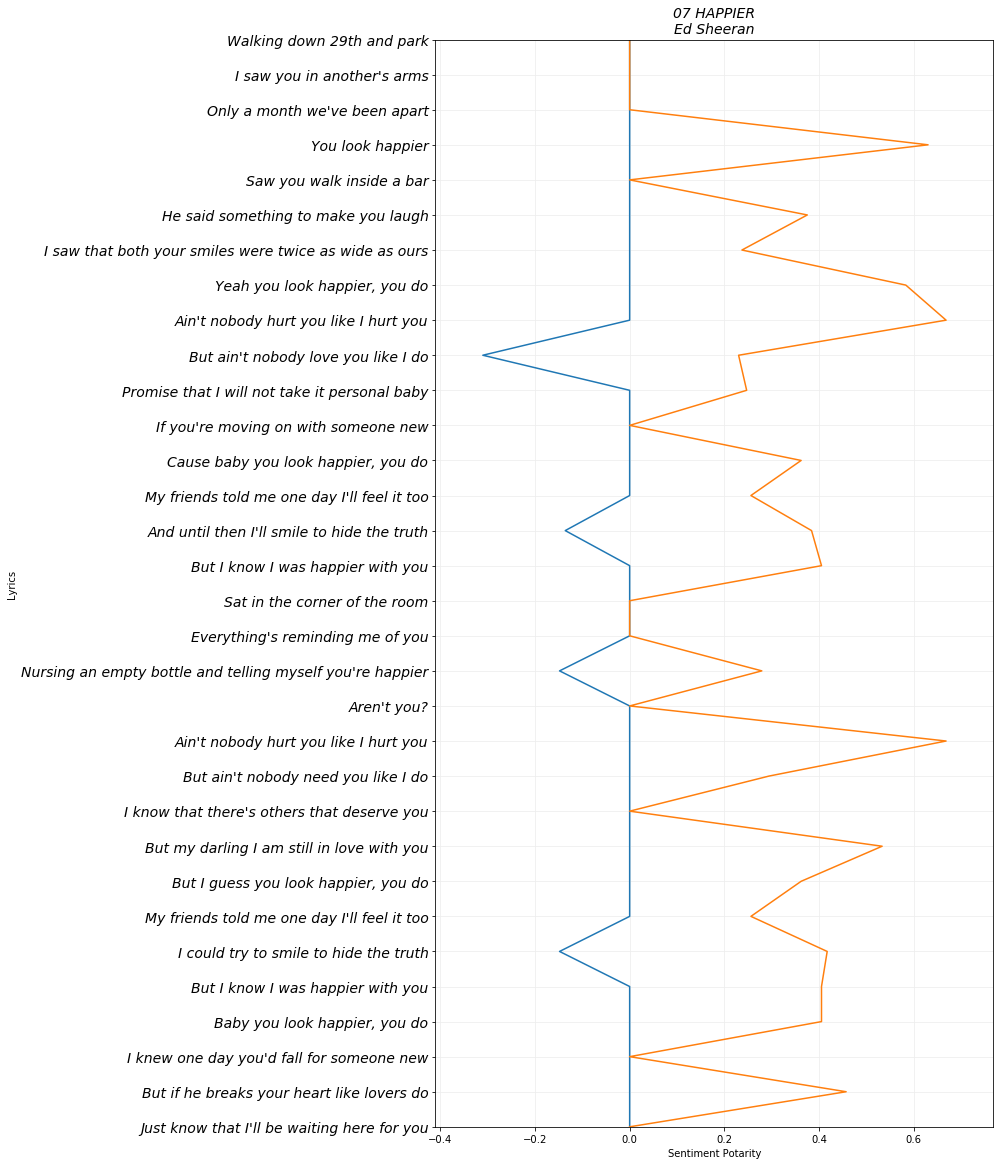

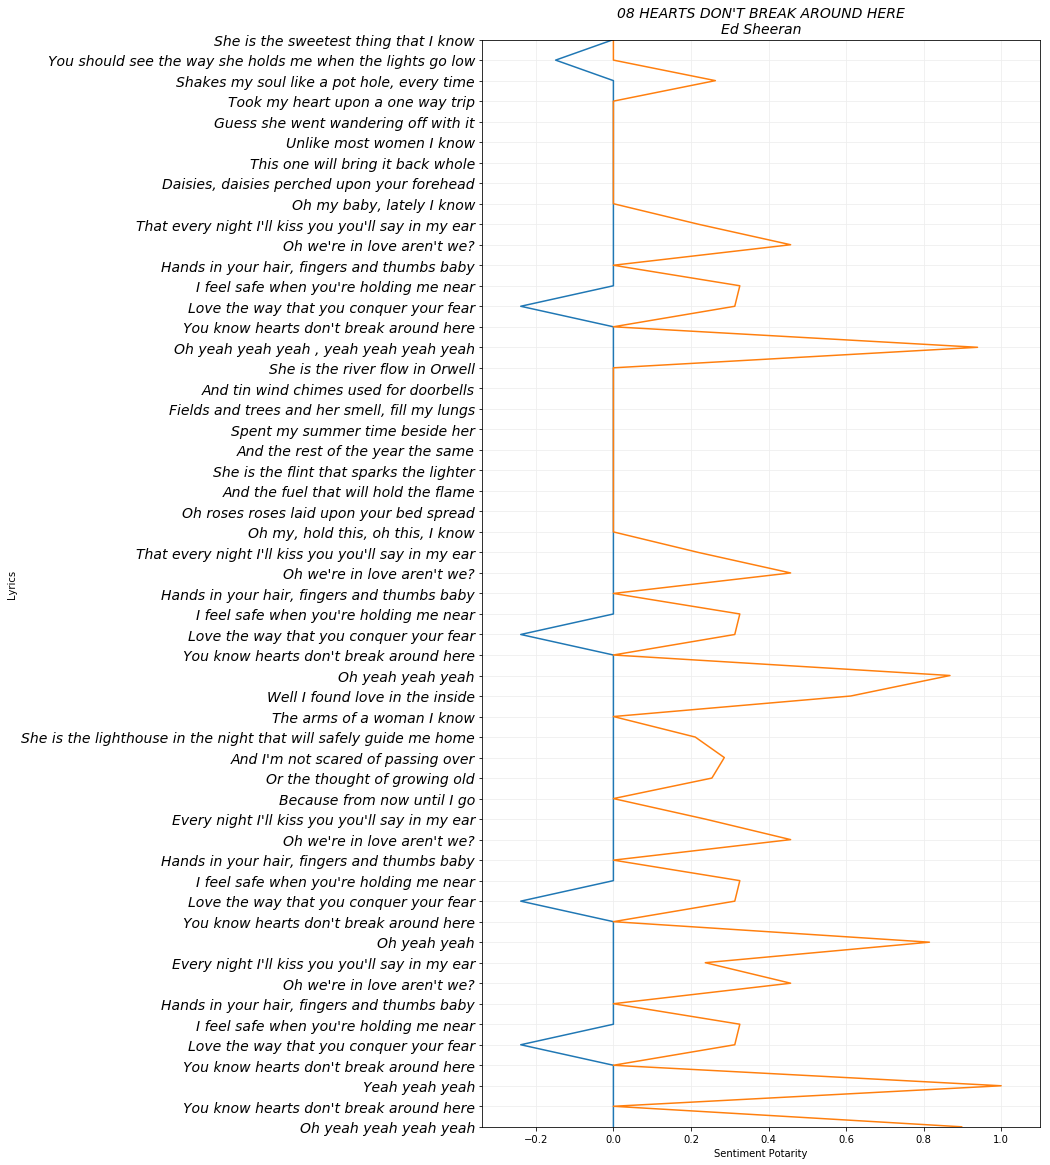

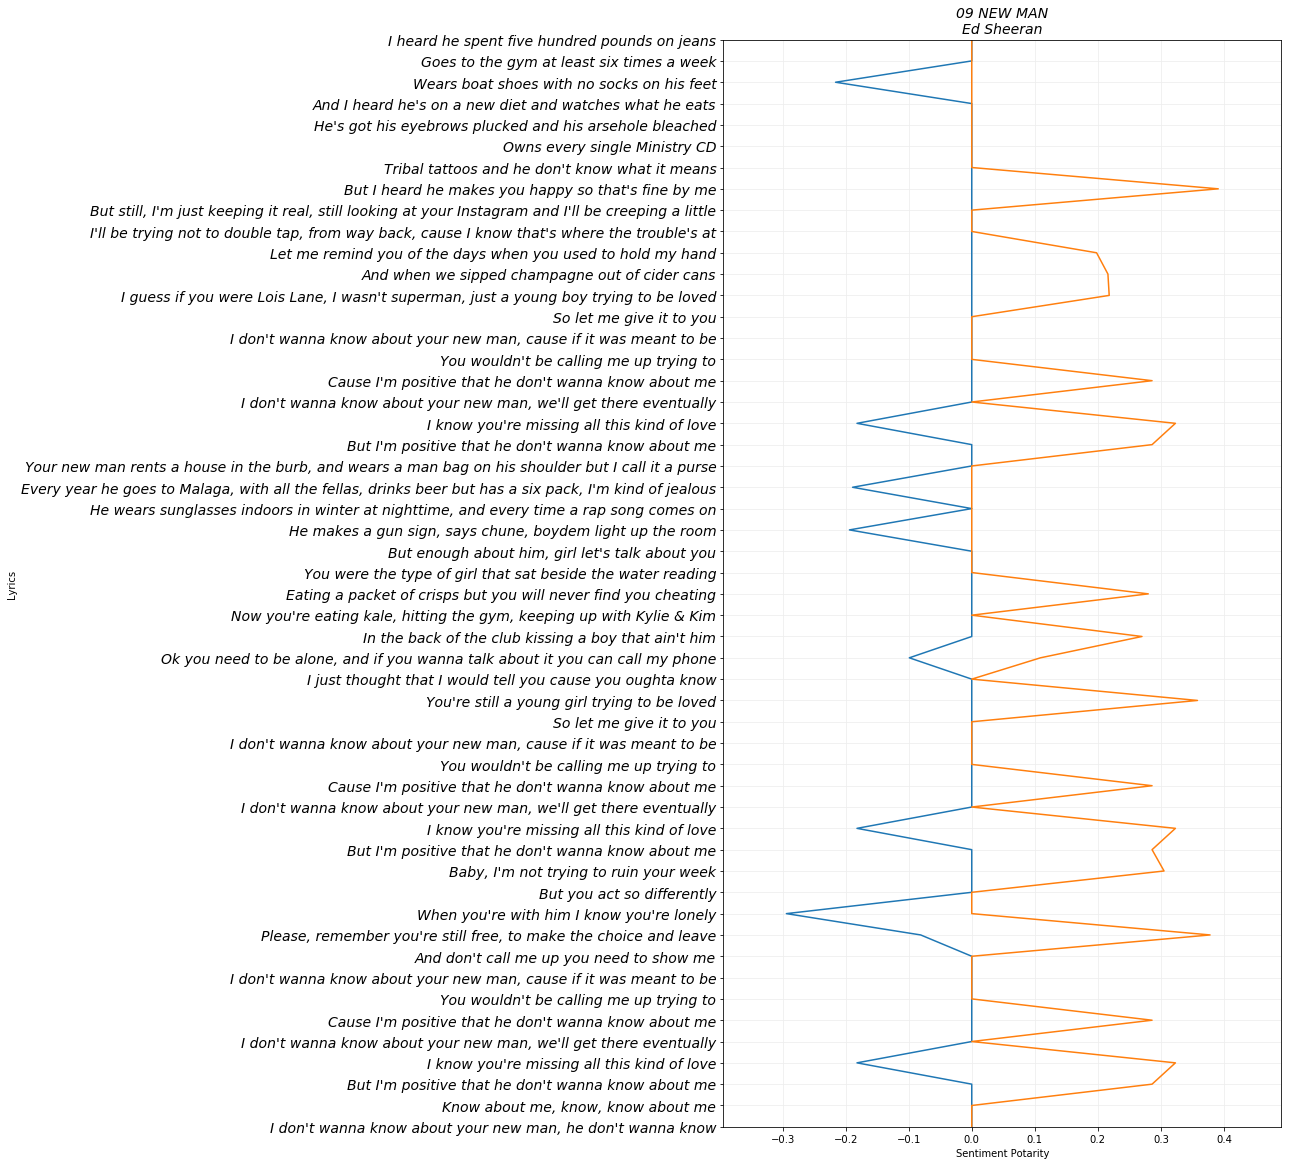

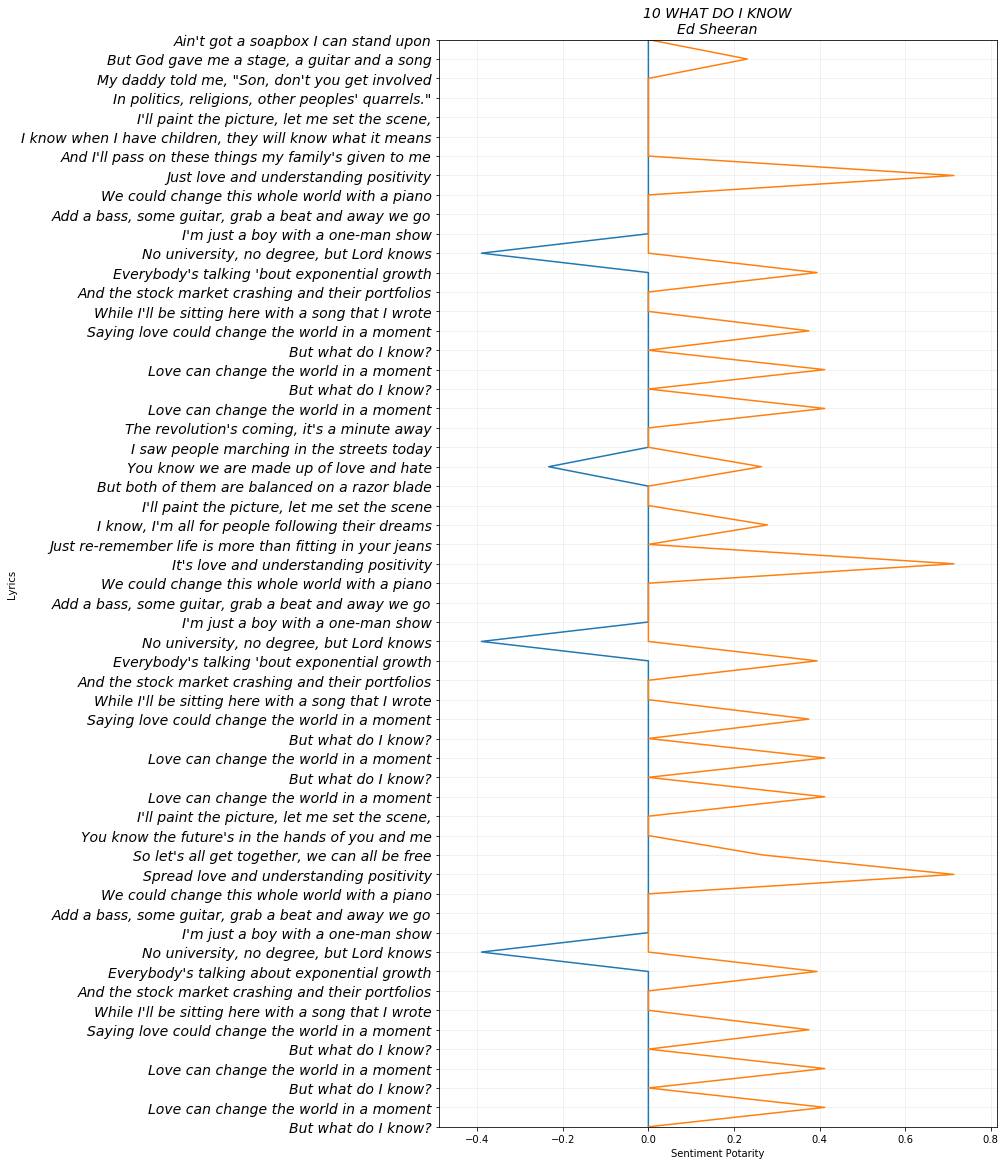

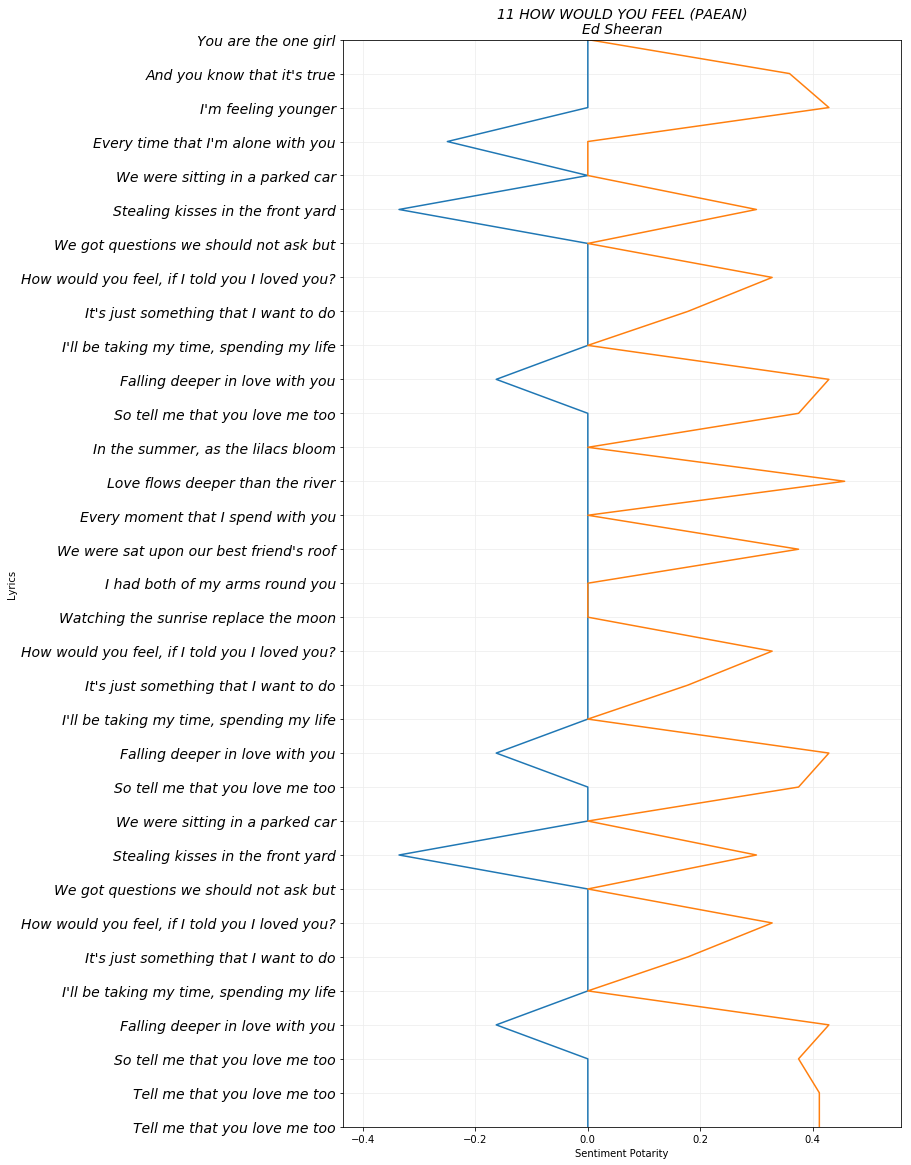

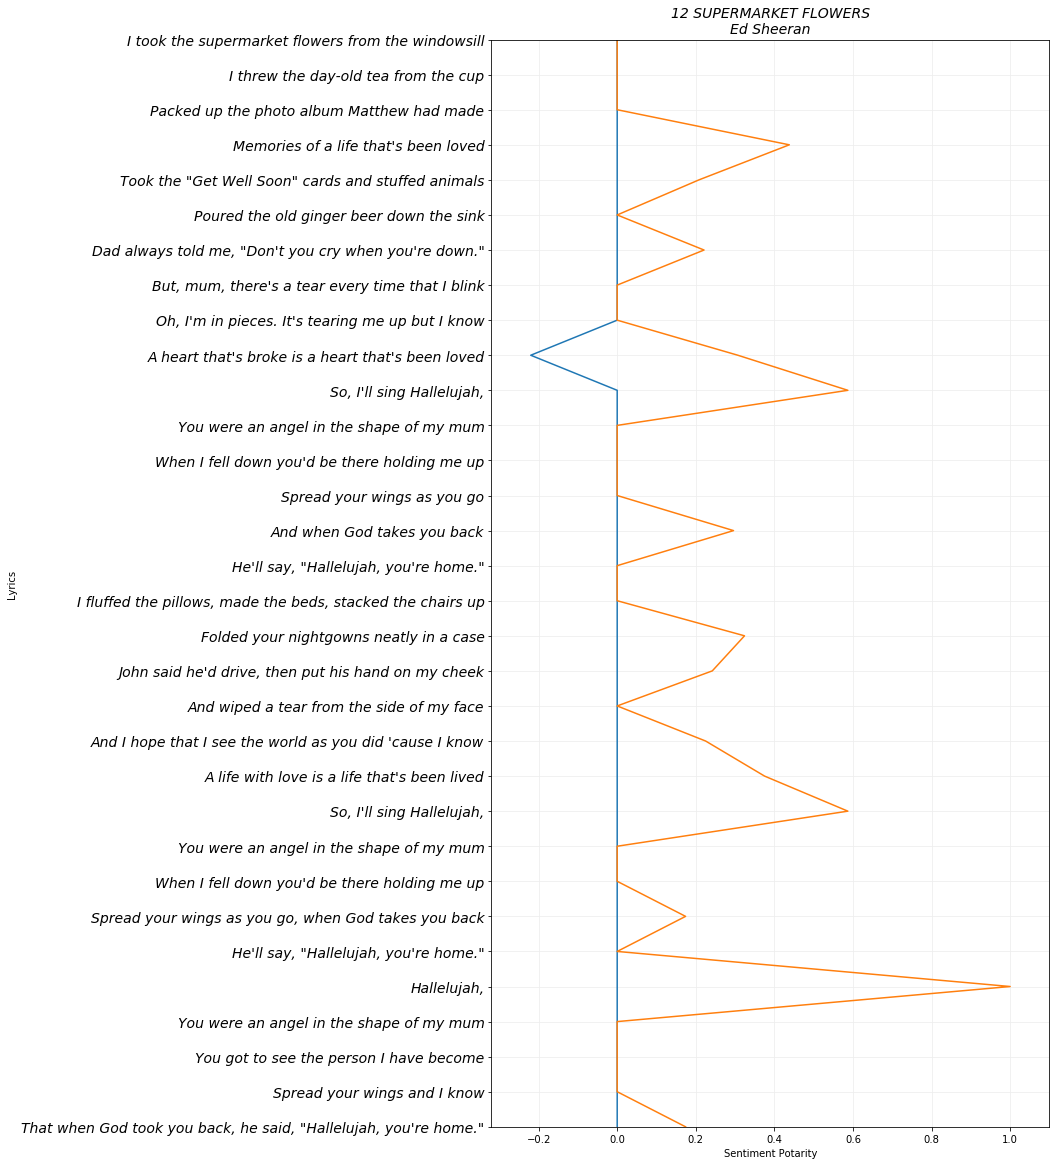

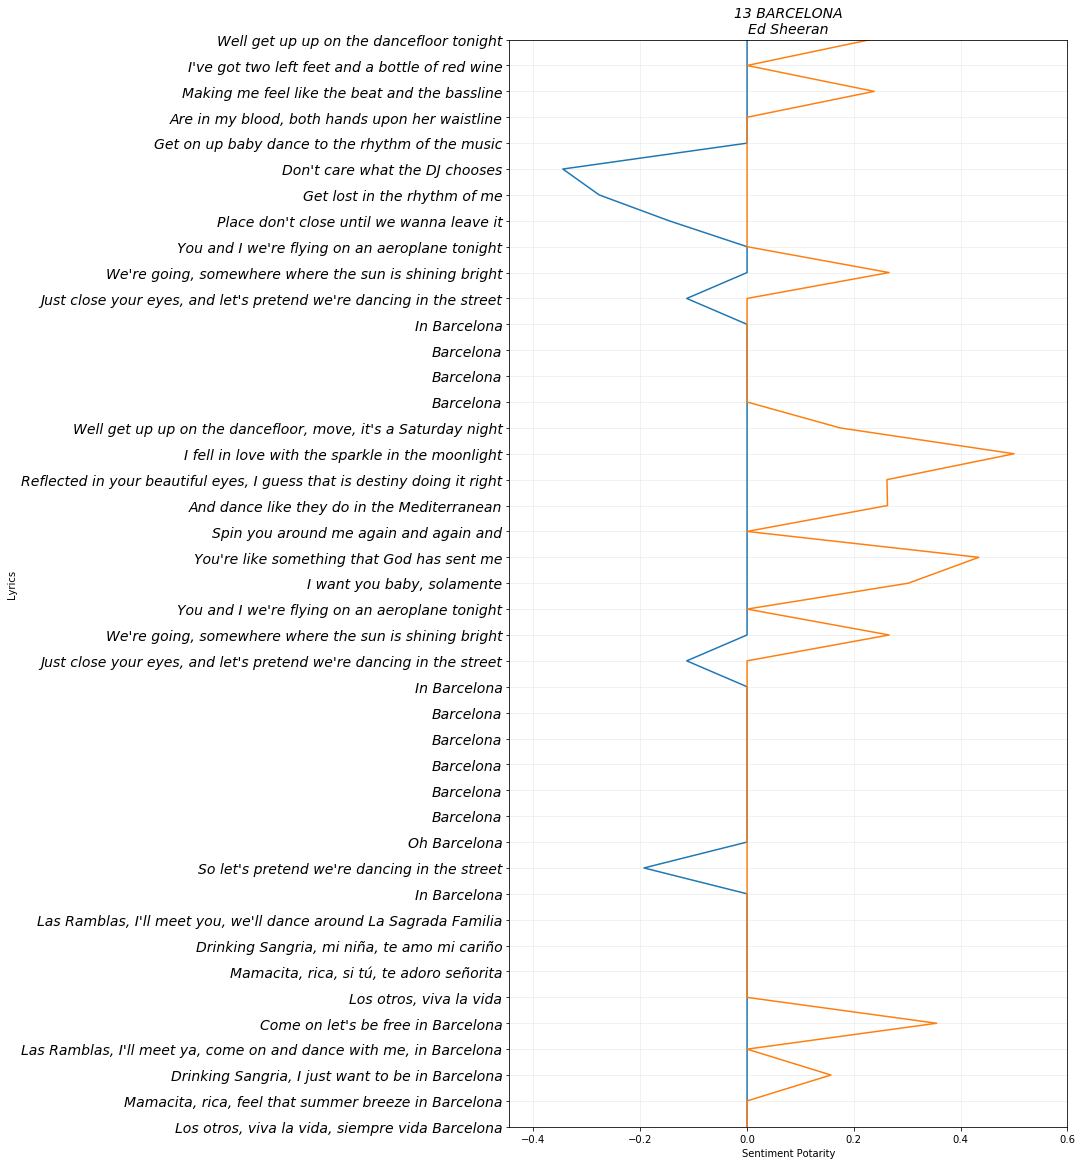

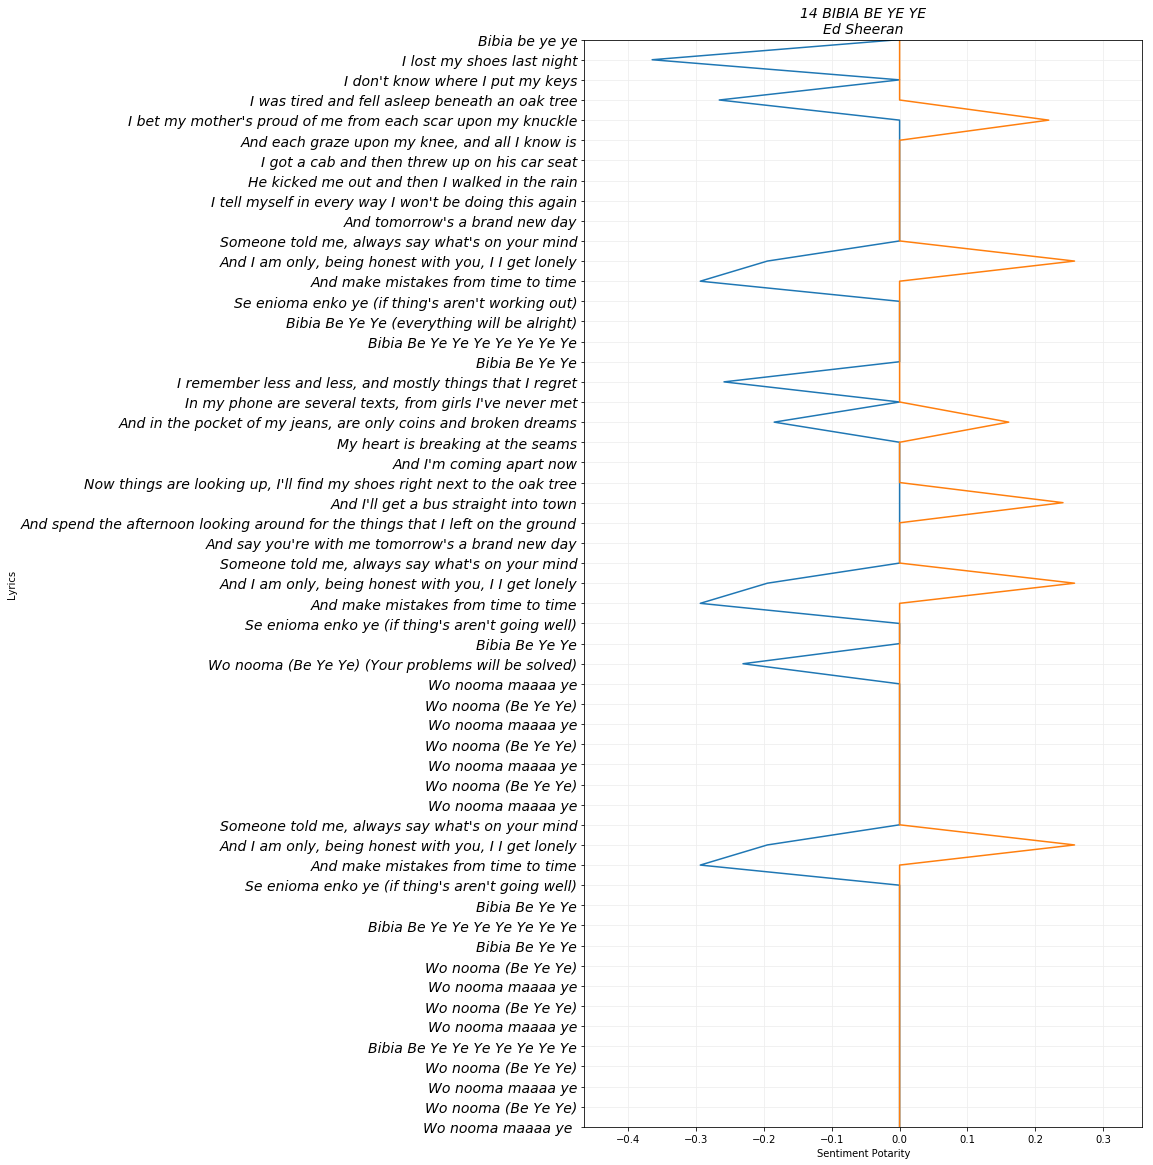

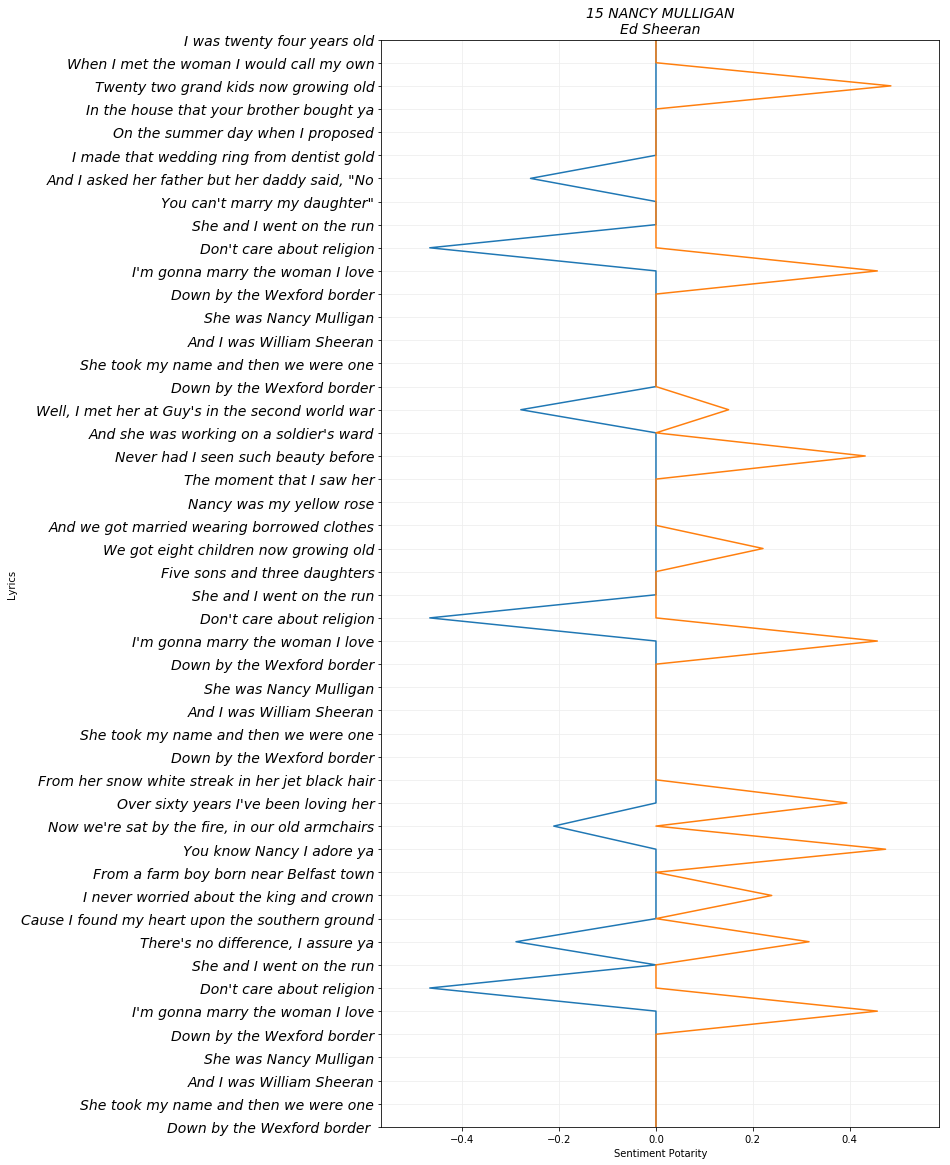

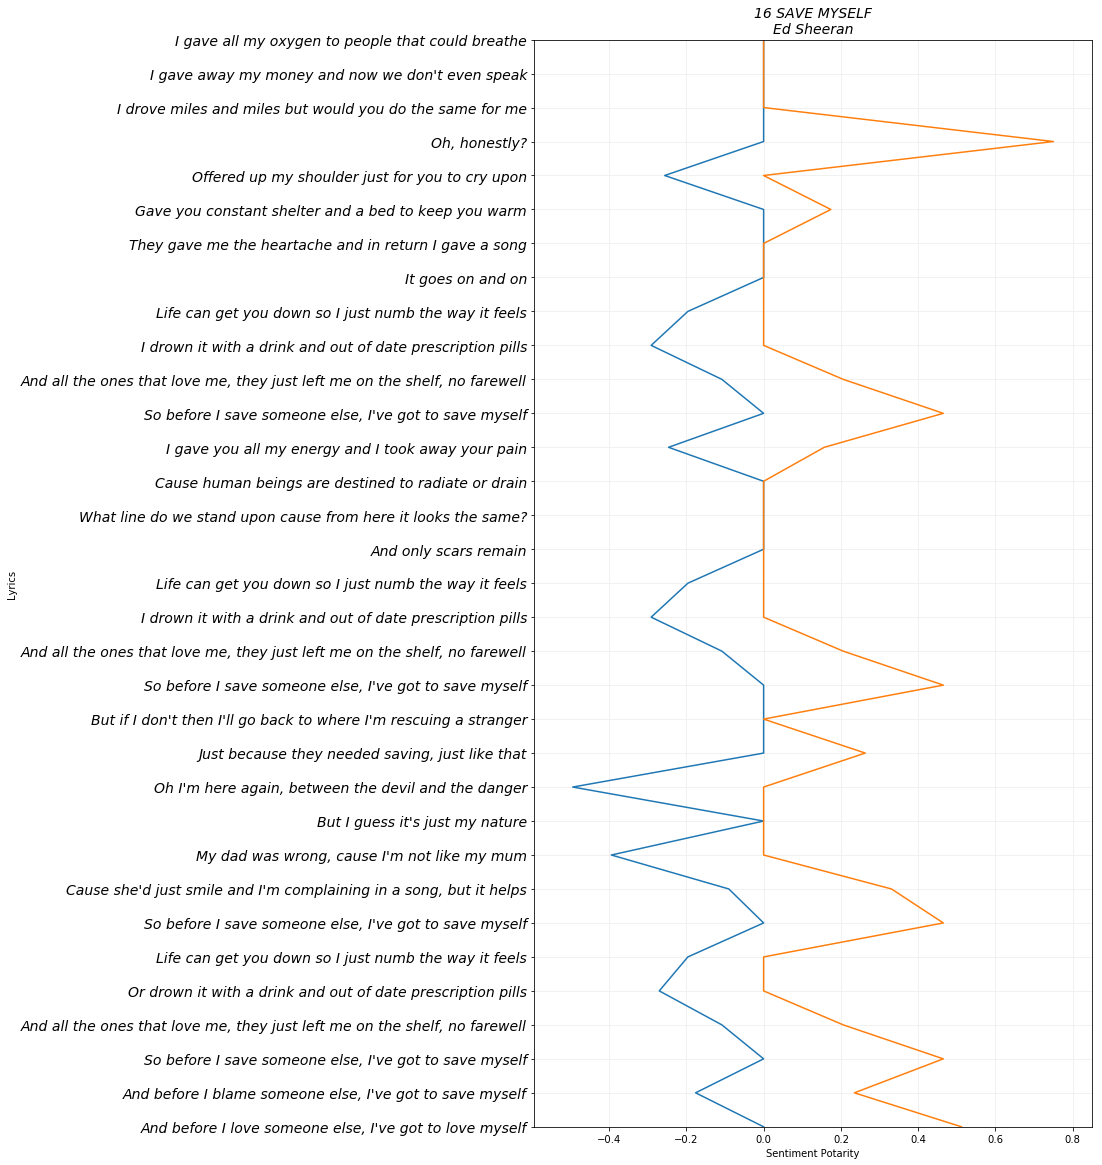

In [1]:
%matplotlib inline
# from nltk import tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

# Read all the song files
path =r'Ed Sheeran/'    
filenames = glob.glob(path+'/*.txt')        

# iterate through the list of songs
for file in filenames:
    song = open(file)

    # split the song per line. NLTK's sent tonkenizer can be used as well.
    lyrics = [p for p in song.read().split('\n') if p]
    neg = []
    neu = []
    pos = []
    analyzer = SentimentIntensityAnalyzer()
    for line in lyrics:
        vs = analyzer.polarity_scores(line)
        # print("{:-<65} {}".format(line, str(vs)))
        neg.append(vs['neg'])
        neu.append(vs['neu'])
        pos.append(vs['pos'])
        
    
    # read through the file name to get the song tite. This will be used as the title of the plot and file name of the image    
    song_title = re.search('\\\\(.*).txt', song.name).group(1).upper() + "\n" + re.search('(.*)\\\\', song.name).group(1)
    # print(song_title)
    
    # Polarity is he emotion expressed in a sentence that can be classified as positive, neagtive or neutral.
    # we are ignoring the neuetral and only get the pos and neg.
    # negative sentiment, to nigate from the positive, multiply them by -1.
    neg = [i*-1 for i in neg]

    #plot neg and pos
    fig = plt.figure()
    ax = plt.axes()
    fig.set_size_inches(10, 20)
    ax.grid(color='#eeeeee', linestyle='solid', zorder = 0)

    ax.plot(neg,range(0,len(neg)));
    ax.plot(pos, range(0,len(pos)));

    ax.set_yticks(np.arange(len(pos)))
    ax.set_yticklabels(lyrics, rotation=0, 
                       ha='right',
                       fontsize = '14',
                       style='italic')

    ax.set_xlim([min(neg)-0.1,max(pos)+0.1])
    ax.set_ylim([len(pos)-1,0])

    ax.set_xlabel('Sentiment Potarity')
    ax.set_ylabel('Lyrics')

    ax.set_title(song_title,
                 fontsize = '14',
                 style='italic')

    plt.savefig(song_title.replace('\n', ' by ')+'.png', bbox_inches='tight')
    